#### Remplacement par des échantillons pris au hasard

Objectif: Il s'agit de de prendre au hasard des observations dans le dataset et pour imputer les valeurs manquantes.

Quand utiliser cette méthode? 
Lorsque les valeurs valeurs manquantes sont supposées MCAR.

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df['Age'].isnull().sum()

177

In [4]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [5]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [6]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##Les observations prises au hasard seront utilisées pour imputer les NaN.
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas a besoin des mêmes indexes afin de concaténer le dataset 
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [7]:
median=df.Age.median()

In [8]:
median

28.0

In [9]:
impute_nan(df,"Age",median)

In [10]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

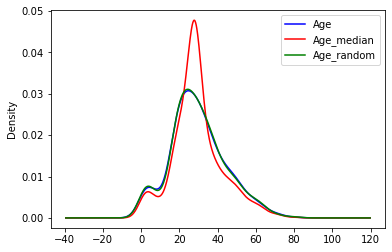

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color = 'blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Avantages
1. Facile d'implementation
2. Il y a moins de distorsion dans la variance

##### Inconvénients
1. Cela ne marche pas forcément dans toutes les situations

##### Capturer les valeurs manquantes dans une nouvelle variable 

Cela fonctionne bien si les valeurs manquantes le sont complètement au hasard

In [16]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [18]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [19]:
df.Age.median()

28.0

In [20]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [22]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Avantages
1. Facile d'implémentation
2. Capture l'importance des valeurs manquantes

##### Inconvénients
1. Creation de variables additionnelles (Fléau de la dimensionalité)

#### Remplacement par des valeurs de fin de distribution (End of Distribution imputation)

In [24]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

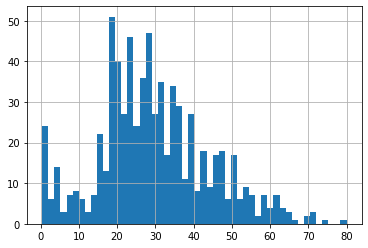

In [25]:
df.Age.hist(bins=50)

In [35]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

68.42067214450208

C:\Users\Brahima Kone\Documents\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

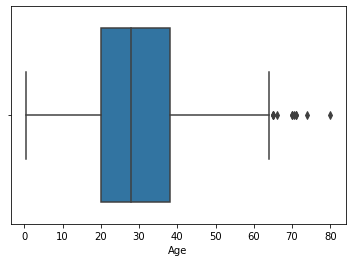

In [27]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [28]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [29]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [30]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

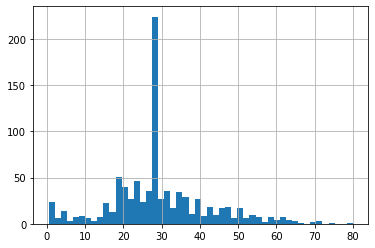

In [31]:
df['Age'].hist(bins=50)

<AxesSubplot:>

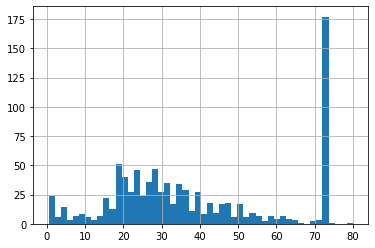

In [32]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Brahima Kone\Documents\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

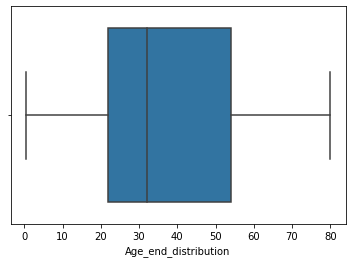

In [34]:
sns.boxplot('Age_end_distribution',data=df)